## Section 2. Data Understanding
### 2.1 Dataset Information

In [331]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# data splitting
from sklearn.model_selection import train_test_split

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder

# missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# binning
from sklearn.preprocessing import KBinsDiscretizer

# polynomial features
from sklearn.preprocessing import PolynomialFeatures

# column transfornmer
from sklearn.compose import ColumnTransformer

# Pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline # Pipeline jika melakukan balancing data

# imbalanced
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, KMeansSMOTE, BorderlineSMOTE
from imblearn.combine import SMOTETomek, SMOTEENN

# cross validation
from sklearn.model_selection import cross_val_score, cross_validate

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# modeling base learners
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


# modeling -> ensemble various type
from sklearn.ensemble import VotingClassifier, StackingClassifier

# ensemble similar type
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Suppress Warning
import warnings
warnings.filterwarnings('ignore')

# Max Column
pd.set_option('display.max_columns', None)

# Save Model
import joblib
import pickle

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, roc_curve, roc_auc_score, RocCurveDisplay, make_scorer, fbeta_score
from sklearn.model_selection import learning_curve

# Model Interpretation
import shap
import lime

# MSNO
import missingno as msno

# VIF Checker
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add Constant for VIF
import statsmodels.api as sm

from scipy.stats import spearmanr

In [332]:
real_df = pd.read_csv('../Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = real_df.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Berikut adalah penjelasan untuk masing-masing kolom:

<table>
    <thead>
        <tr>
            <th>Kolom</th>
            <th>Definisi</th>
            <th>Value dan Penjelasan</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><b>customerID</b></td>
            <td>ID unik untuk setiap pelanggan.</td>
            <td><code>Teks alfanumerik</code>: Kode unik pengenal pelanggan.</td>
        </tr>
        <tr>
            <td><b>gender</b></td>
            <td>Jenis kelamin pelanggan.</td>
            <td><code>Male</code>: Laki-laki.<br><code>Female</code>: Perempuan.</td>
        </tr>
        <tr>
            <td><b>SeniorCitizen</b></td>
            <td>Bagaimanakah pelanggan seorang warga senior.</td>
            <td><code>1</code>: Ya, warga senior.<br><code>0</code>: Bukan warga senior.</td>
        </tr>
        <tr>
            <td><b>Partner</b></td>
            <td>Bagaimanakah pelanggan memiliki pasangan.</td>
            <td><code>Yes</code>: Punya pasangan.<br><code>No</code>: Tidak punya pasangan.</td>
        </tr>
        <tr>
            <td><b>Dependents</b></td>
            <td>Bagaimanakah pelanggan memiliki tanggungan.</td>
            <td><code>Yes</code>: Punya tanggungan.<br><code>No</code>: Tidak punya tanggungan.</td>
        </tr>
        <tr>
            <td><b>tenure</b></td>
            <td>Lama berlangganan dalam bulan.</td>
            <td><code>Numerik</code>: Jumlah bulan pelanggan bersama perusahaan.</td>
        </tr>
        <tr>
            <td><b>Contract</b></td>
            <td>Jenis kontrak berlangganan.</td>
            <td><code>Month-to-month</code>: Kontrak bulanan.<br><code>One year</code>: Kontrak satu tahun.<br><code>Two year</code>: Kontrak dua tahun.</td>
        </tr>
        <tr>
            <td><b>PaperlessBilling</b></td>
            <td>Menggunakan tagihan elektronik.</td>
            <td><code>Yes</code>: Tagihan via email.<br><code>No</code>: Tagihan fisik.</td>
        </tr>
        <tr>
            <td><b>PaymentMethod</b></td>
            <td>Metode pembayaran yang digunakan.</td>
            <td><code>Electronic check</code>: Pembayaran dengan cek elektronik.<br><code>Mailed check</code>: Pembayaran dengan mengirimkan cek fisik.<br><code>Bank transfer (automatic)</code>: Pembayaran melalui transfer bank otomatis.<br><code>Credit card (automatic)</code>: Pembayaran melalui kartu kredit otomatis.</td>
        </tr>
        <tr>
            <td><b>MonthlyCharges</b></td>
            <td>Tagihan setiap bulan.</td>
            <td><code>Numerik Desimal</code>: Total biaya bulanan untuk semua layanan.</td>
        </tr>
        <tr>
            <td><b>TotalCharges</b></td>
            <td>Total tagihan selama berlangganan.</td>
            <td><code>Numerik Desimal</code>: Akumulasi semua tagihan bulanan.</td>
        </tr>
        <tr>
            <td><b>PhoneService</b></td>
            <td>Bagaimanakah pelanggan punya layanan telepon.</td>
            <td><code>Yes</code>: Punya layanan telepon.<br><code>No</code>: Tidak punya.</td>
        </tr>
        <tr>
            <td><b>MultipleLines</b></td>
            <td>Bagaimanakah punya lebih dari satu saluran telepon.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Punya telepon, tapi hanya 1 saluran.<br><code>No phone service</code>: Tidak punya layanan telepon.</td>
        </tr>
        <tr>
            <td><b>InternetService</b></td>
            <td>Tipe layanan internet pelanggan.</td>
            <td><code>DSL</code>: Layanan internet melalui jalur telepon standar.<br><code>Fiber optic</code>: Layanan internet berkecepatan tinggi melalui kabel fiber optik.<br><code>No</code>: Tidak berlangganan internet.</td>
        </tr>
        <tr>
            <td><b>OnlineSecurity</b></td>
            <td>Bagaimanakah punya layanan keamanan online.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>OnlineBackup</b></td>
            <td>Bagaimanakah punya layanan backup online.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>DeviceProtection</b></td>
            <td>Bagaimanakah punya proteksi perangkat.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>TechSupport</b></td>
            <td>Bagaimanakah punya dukungan teknis premium.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>StreamingTV</b></td>
            <td>Bagaimanakah streaming TV dari Telco.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>StreamingMovies</b></td>
            <td>Bagaimanakah streaming film dari Telco.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>Churn</b></td>
            <td><b>(Target)</b> Bagaimanakah pelanggan berhenti.</td>
            <td><code>Yes</code>: Pelanggan berhenti berlangganan.<br><code>No</code>: Pelanggan masih aktif.</td>
        </tr>
    </tbody>
</table>

### 2.2 Missing Values Checking

In [333]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### 2.3 Dataset Filtering

In [334]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [335]:
df_month = df[(df['Contract'] == 'Month-to-month') & (df['tenure'] >= 1)]
df_month.shape

(3875, 21)

In [336]:
df_oneyear = df[(df['Contract'] == 'One year') & (df['tenure'] >= 12)]
df_oneyear.shape

(1371, 21)

In [337]:
df_twoyear = df[(df['Contract'] == 'Two year') & (df['tenure'] >= 24)]
df_twoyear.shape

(1553, 21)

In [338]:
df = pd.concat([df_month, df_oneyear, df_twoyear], axis=0).reset_index().drop(columns = 'index')
df.shape

(6799, 21)

### 2.3 Duplicated Values Checking

In [339]:
df.duplicated().sum()

np.int64(0)

Hasil pemeriksaan duplikasi dengan fungsi `df.duplicated().sum()` menunjukkan bahwa tidak terdapat baris yang sama persis (duplikat) dalam dataset, yaitu sejumlah 0 baris duplikat. Hal ini menandakan bahwa setiap entri dalam data bersifat unik setelah penghapusan baris dengan `tenure = 0`, sehingga tidak diperlukan tindakan lebih lanjut terkait duplikasi. Keberadaan data yang bebas duplikasi sangat penting untuk menjaga kualitas analisis dan mencegah bias yang dapat muncul pada tahap pelatihan model machine learning.

### 2.4 Dataset Restructuring

In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6799 entries, 0 to 6798
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6799 non-null   object 
 1   gender            6799 non-null   object 
 2   SeniorCitizen     6799 non-null   int64  
 3   Partner           6799 non-null   object 
 4   Dependents        6799 non-null   object 
 5   tenure            6799 non-null   int64  
 6   PhoneService      6799 non-null   object 
 7   MultipleLines     6799 non-null   object 
 8   InternetService   6799 non-null   object 
 9   OnlineSecurity    6799 non-null   object 
 10  OnlineBackup      6799 non-null   object 
 11  DeviceProtection  6799 non-null   object 
 12  TechSupport       6799 non-null   object 
 13  StreamingTV       6799 non-null   object 
 14  StreamingMovies   6799 non-null   object 
 15  Contract          6799 non-null   object 
 16  PaperlessBilling  6799 non-null   object 


In [341]:
# Mengubah kolom tertentu menjadi tipe data kategorikal
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

df[cat_cols] = df[cat_cols].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6799 entries, 0 to 6798
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        6799 non-null   object  
 1   gender            6799 non-null   category
 2   SeniorCitizen     6799 non-null   category
 3   Partner           6799 non-null   category
 4   Dependents        6799 non-null   category
 5   tenure            6799 non-null   int64   
 6   PhoneService      6799 non-null   category
 7   MultipleLines     6799 non-null   category
 8   InternetService   6799 non-null   category
 9   OnlineSecurity    6799 non-null   category
 10  OnlineBackup      6799 non-null   category
 11  DeviceProtection  6799 non-null   category
 12  TechSupport       6799 non-null   category
 13  StreamingTV       6799 non-null   category
 14  StreamingMovies   6799 non-null   category
 15  Contract          6799 non-null   category
 16  PaperlessBilling  6799 n

In [342]:
num_cols = ['MonthlyCharges', 'TotalCharges']
df[num_cols] = df[num_cols].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6799 entries, 0 to 6798
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        6799 non-null   object  
 1   gender            6799 non-null   category
 2   SeniorCitizen     6799 non-null   category
 3   Partner           6799 non-null   category
 4   Dependents        6799 non-null   category
 5   tenure            6799 non-null   int64   
 6   PhoneService      6799 non-null   category
 7   MultipleLines     6799 non-null   category
 8   InternetService   6799 non-null   category
 9   OnlineSecurity    6799 non-null   category
 10  OnlineBackup      6799 non-null   category
 11  DeviceProtection  6799 non-null   category
 12  TechSupport       6799 non-null   category
 13  StreamingTV       6799 non-null   category
 14  StreamingMovies   6799 non-null   category
 15  Contract          6799 non-null   category
 16  PaperlessBilling  6799 n

### 2.5 Exploratory Data Analysis (EDA)

In [ ]:
CHURN_PALETTE = {'No': 'gray', 'Yes': 'firebrick'}

def plot_box_and_kde_churn(df, col, target='Churn', figsize=(15, 6)):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    plt.suptitle(f'Distribution of {col} Based on {target}', fontsize=16, y=1.02)

    # Boxplot
    sns.boxplot(data=df, x=col, y=target, orient='h',
                ax=axes[0], hue=target, palette=CHURN_PALETTE)
    axes[0].set_title(f'Boxplot of {col}')
    
    # Remove legend from boxplot (safely)
    legend = axes[0].get_legend()
    if legend is not None:
        legend.remove()

    # KDE plot with custom legend labels
    for label in df[target].unique():
        subset = df[df[target] == label]
        label_text = f"{label}" if label == "Yes" else f"{label}"
        sns.kdeplot(
            data=subset, x=col, fill=True, common_norm=False,
            alpha=0.5, ax=axes[1], label=label_text, color=CHURN_PALETTE.get(label, 'gray')
        )

    axes[1].set_title(f'Distribution of {col}')
    axes[1].legend(title=target)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # Statistik deskriptif
    stats = df.groupby(target)[col].describe()
    stats['IQR'] = stats['75%'] - stats['25%']
    display(stats)


Fungsi `plot_box_and_kde_churn` digunakan untuk menganalisis distribusi variabel numerik berdasarkan kategori target seperti 'Churn'. Fungsi ini menghasilkan dua visualisasi berdampingan: boxplot horizontal yang memisahkan data berdasarkan nilai target untuk mengamati sebaran dan potensi outlier, serta KDE plot (Kernel Density Estimate) untuk melihat pola distribusi tiap kategori secara halus. Selain visualisasi, fungsi ini menghitung dan menampilkan tabel statistik deskriptif (count, mean, std, min, kuartil, dan IQR) yang dikelompokkan berdasarkan nilai target, sehingga mempermudah perbandingan karakteristik numerik antar kategori.


In [345]:
def plot_stacked_barh_churn(df, col, target='Churn', figsize=(15, 5)):
    # Hitung count & percentage
    counts = df.groupby([col, target], observed=True).size().unstack(fill_value=0)
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100

    # Pastikan urutan kolom: No, Yes
    desired_order = ['No', 'Yes']
    actual_order = [c for c in desired_order if c in percentages.columns]
    counts = counts[actual_order]
    percentages = percentages[actual_order]

    # Urutkan berdasarkan persentase churn (ascending)
    sort_order = percentages['No'].sort_values(ascending=True).index
    counts = counts.loc[sort_order]
    percentages = percentages.loc[sort_order]

    # Visualisasi stacked bar
    fig, ax = plt.subplots(figsize=figsize)
    left = [0] * len(percentages)

    for status in actual_order:
        values = percentages[status]
        bar = ax.barh(percentages.index, values, left=left,
                      label=status, color=CHURN_PALETTE.get(status, 'gray'))

        for i, (pct, cnt) in enumerate(zip(values, counts[status])):
            if pct > 0:
                ax.text(left[i] + pct / 2, i, f'{pct:.1f}%\n({cnt})',
                        ha='center', va='center',
                        fontsize=10, fontweight='bold',
                        color='white' if pct > 15 else 'black')
        left = [l + v for l, v in zip(left, values)]

    plt.suptitle(f'Distribution of {col} Based on {target}', fontsize=16, y=1.02)
    ax.set_xlabel('Percentage')
    ax.set_ylabel('')
    ax.legend(title=target, loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.tight_layout()
    plt.show()

    # Tabel gabungan (Count dan Persentase)
    table = counts.copy()
    for status in actual_order:
        table[f'{status} (%)'] = percentages[status].apply(lambda x: f'{x:.1f}%')

    table = table.reset_index()
    display(table)


Fungsi `plot_stacked_barh_churn` digunakan untuk memvisualisasikan distribusi variabel kategorikal berdasarkan target seperti 'Churn' dalam bentuk stacked bar chart horizontal. Fungsi ini menghitung jumlah dan persentase tiap kategori target dalam setiap kelas variabel, lalu mengurutkan data berdasarkan persentase kategori 'No' secara menaik. Visualisasi menampilkan batang tersegmentasi untuk masing-masing kategori target, disertai anotasi berupa persentase dan jumlah absolut untuk mempermudah interpretasi. Fungsi ini sangat berguna untuk membandingkan proporsi churn antar kategori dan mengidentifikasi kelompok dengan tingkat churn tinggi.


In [346]:
def plot_scatter_churn(df, col1, col2):
    # Create the scatterplot with corrected palette keys
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=df, 
        x=col1, 
        y=col2, 
        hue='Churn', 
        palette={0: 'gray', 1: 'firebrick'}, 
        alpha=0.5
    )
    plt.title(f'Distribution of {col1} and {col2} by Churn Status')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

    # Calculate Spearman correlation for churned and non-churned customers
    corr_churn, _ = spearmanr(df[df['Churn'] == 1][col1], df[df['Churn'] == 1][col2])
    corr_not_churn, _ = spearmanr(df[df['Churn'] == 0][col1], df[df['Churn'] == 0][col2])

    # Print the correlation results
    print(f'''
Spearman Correlation (Churn): {corr_churn:.4f}
Spearman Correlation (Not Churn): {corr_not_churn:.4f}
''')

Lorem ipsum

#### 2.5.1 Apakah terdapat perbedaan lama pelanggan berlangganan antara yang churn dan tidak churn?

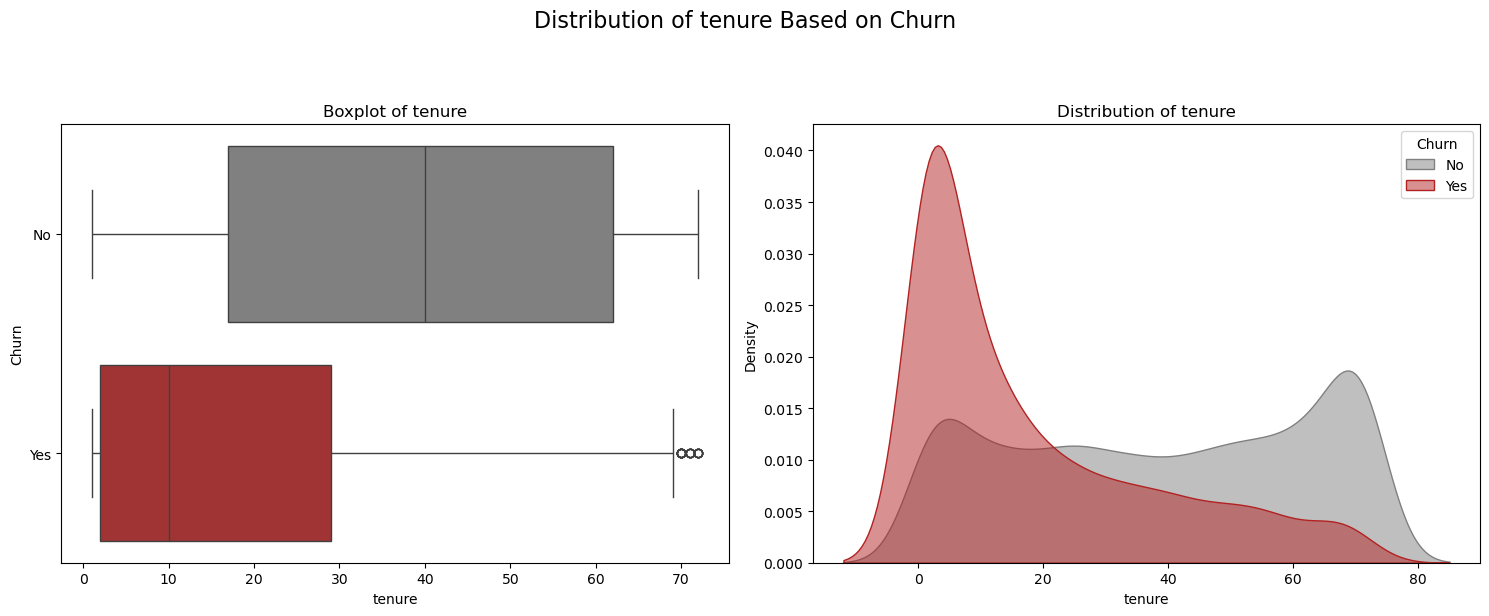

,count,mean,std,min,25%,50%,75%,max,IQR
Churn,,,,,,,,,
No,4938.0,38.872620,23.878867,1.0,17.0,40.0,62.0,72.0,45.0
Yes,1861.0,18.030629,19.556195,1.0,2.0,10.0,29.0,72.0,27.0


In [347]:
plot_box_and_kde_churn(df, 'tenure')

Lorem ipsum

#### 2.5.2 Apakah terdapat perbedaan total pengeluaran pelanggan antara yang churn dan tidak churn?


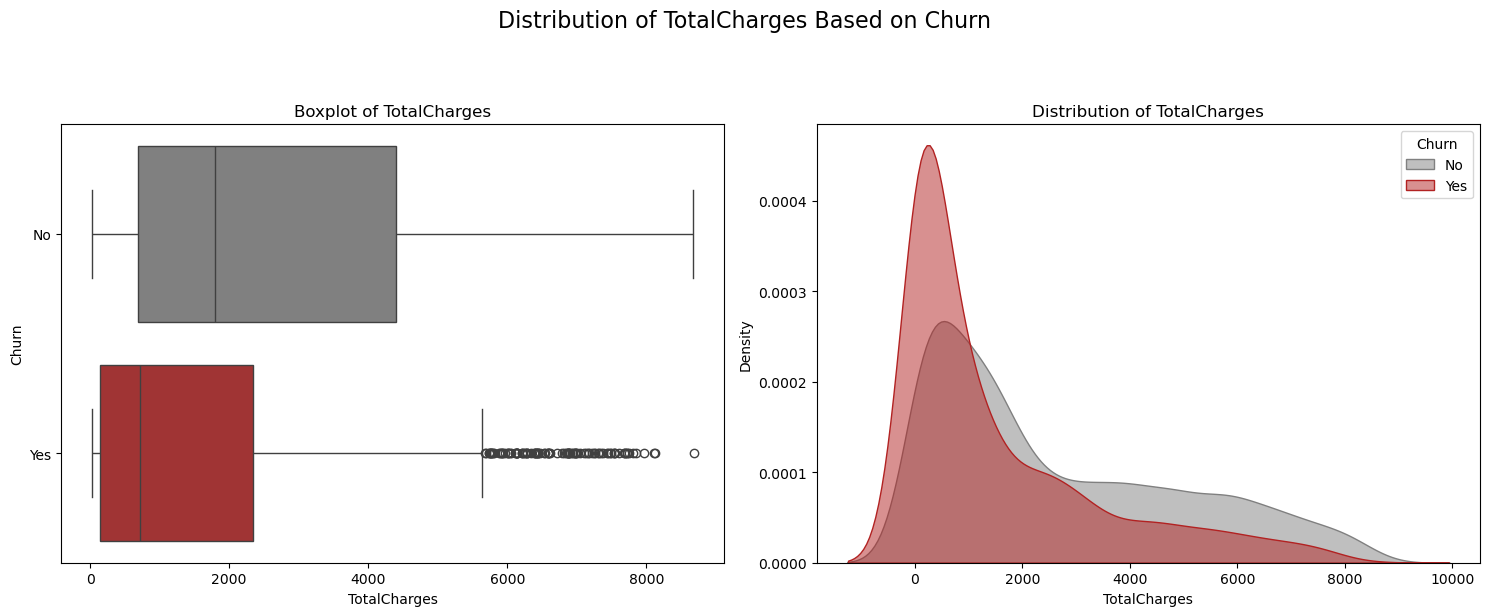

,count,mean,std,min,25%,50%,75%,max,IQR
Churn,,,,,,,,,
No,4938.0,2655.957493,2331.711899,18.85,688.625,1802.35,4392.2375,8672.45,3703.6125
Yes,1861.0,1537.272810,1893.004442,18.85,134.500,712.85,2342.2000,8684.80,2207.7000


In [348]:
plot_box_and_kde_churn(df, 'TotalCharges')

Lorem ipsum

#### 2.5.3 Bagaimana perbedaan biaya bulanan pelanggan antara yang churn dan tidak churn?


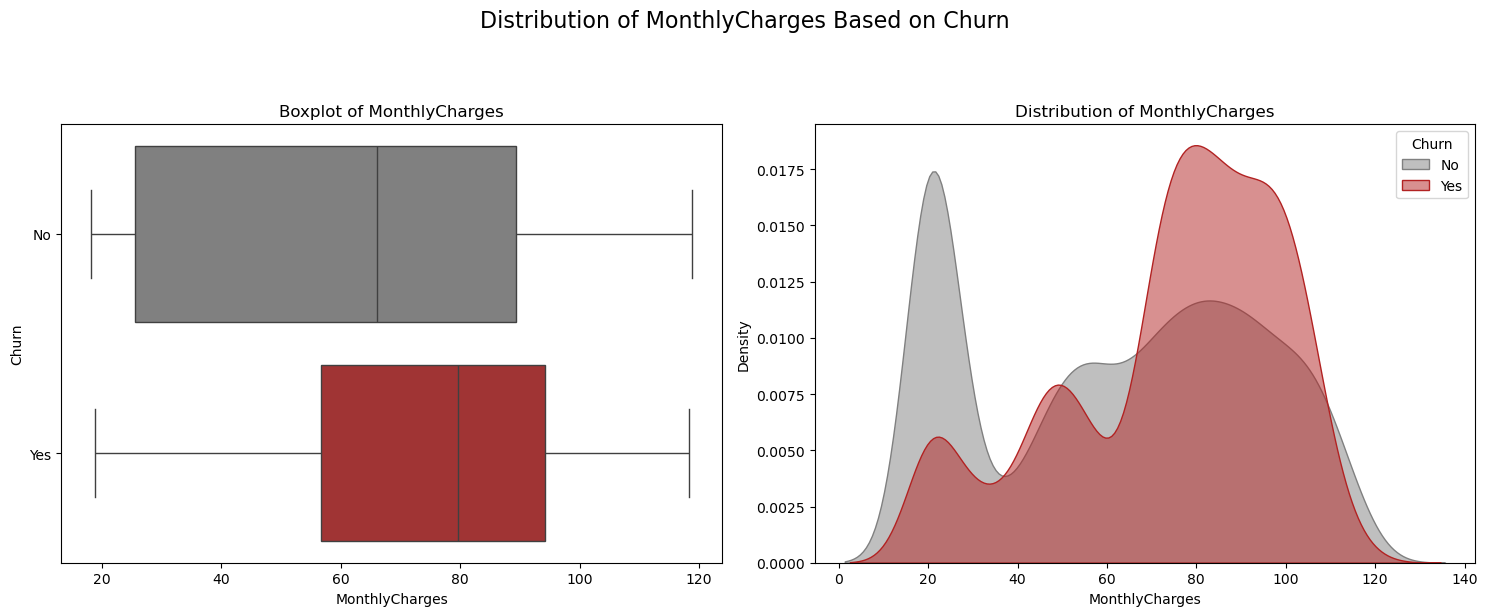

,count,mean,std,min,25%,50%,75%,max,IQR
Churn,,,,,,,,,
No,4938.0,62.676387,30.848467,18.25,25.60,66.125,89.25,118.75,63.65
Yes,1861.0,74.573267,24.563471,18.85,56.65,79.650,94.25,118.35,37.60


In [349]:
plot_box_and_kde_churn(df, 'MonthlyCharges')

Lorem ipsum

#### 2.5.4 Bagaimana perbedaan tingkat churn antara pelanggan laki-laki dan perempuan?

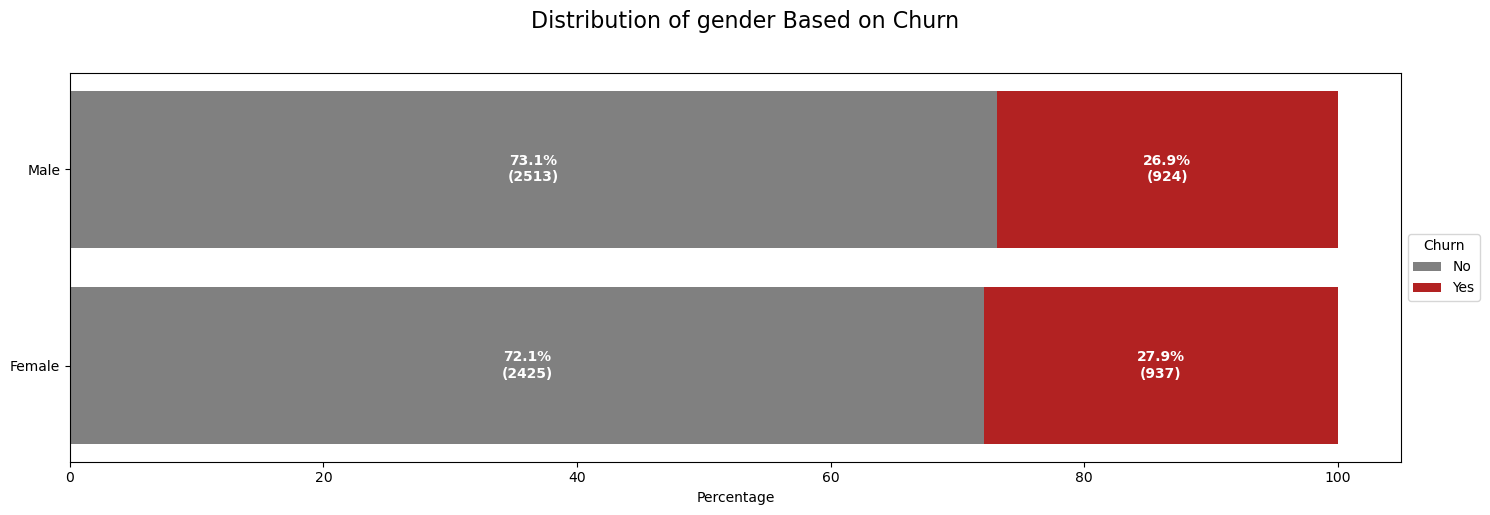

Churn,gender,No,Yes,No (%),Yes (%)
0,Female,2425,937,72.1%,27.9%
1,Male,2513,924,73.1%,26.9%


In [350]:
plot_stacked_barh_churn(df, 'gender')

Lorem ipsum

#### 2.5.5 Bagaimana perbedaan tingkat churn antara pelanggan lansia dan non-lansia?


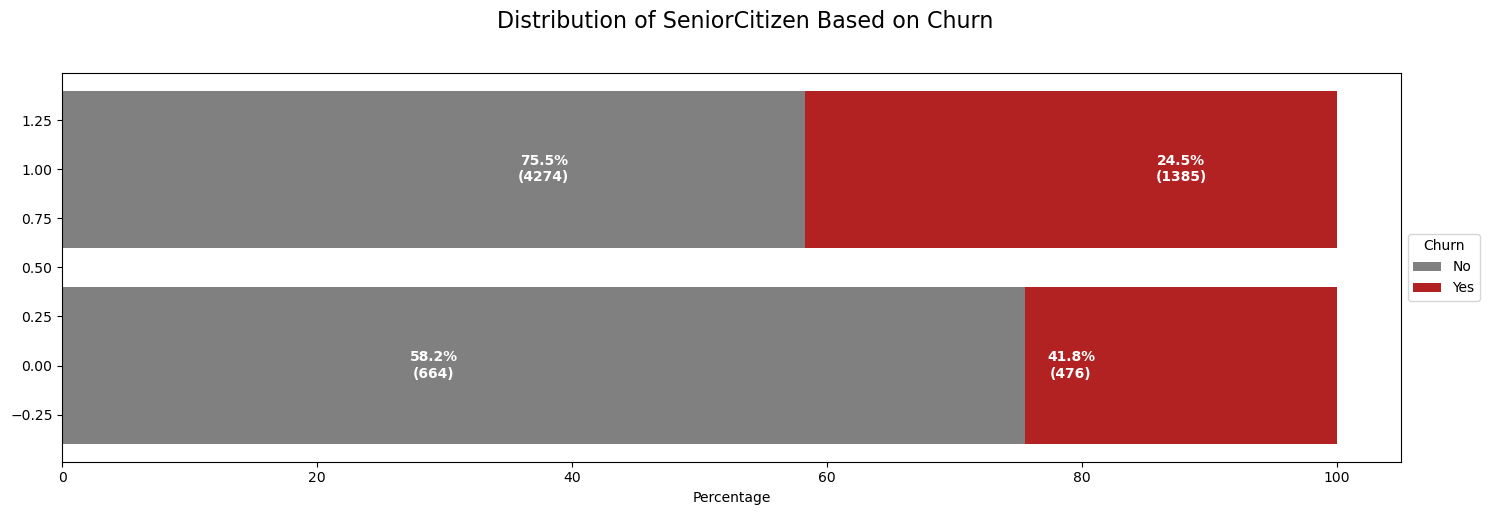

Churn,SeniorCitizen,No,Yes,No (%),Yes (%)
0,1,664,476,58.2%,41.8%
1,0,4274,1385,75.5%,24.5%


In [351]:
plot_stacked_barh_churn(df, 'SeniorCitizen')

Lorem ipsum

#### 2.5.6 Bagaimana perbedaan tingkat churn antara pelanggan yang memiliki pasangan dan yang tidak?


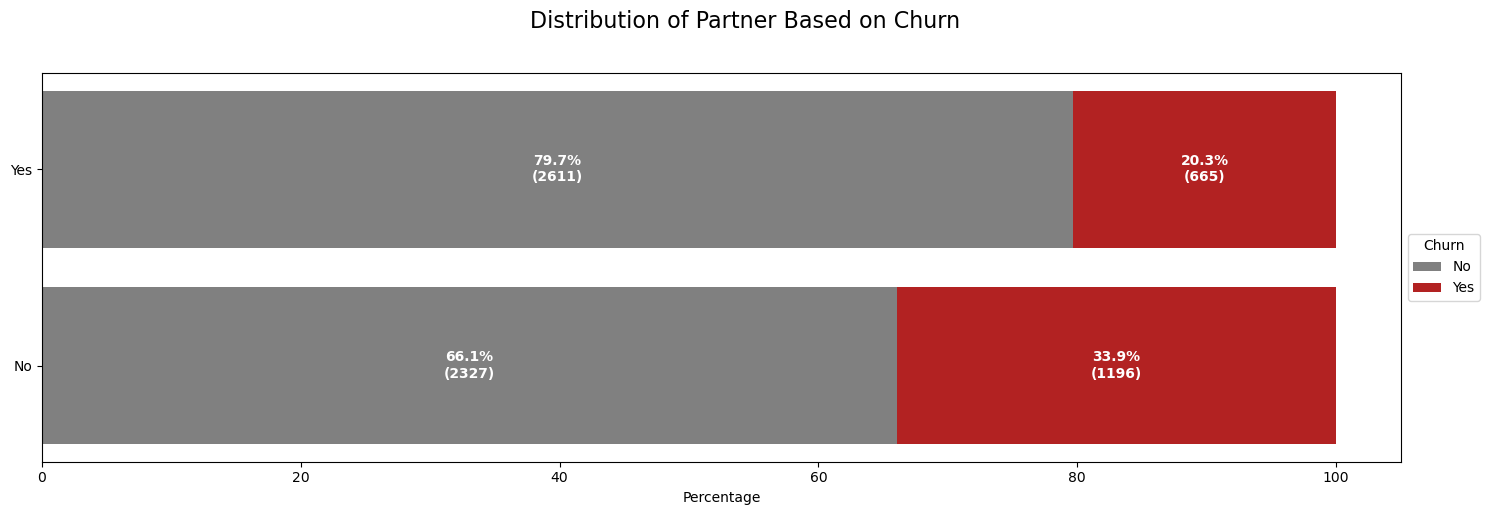

Churn,Partner,No,Yes,No (%),Yes (%)
0,No,2327,1196,66.1%,33.9%
1,Yes,2611,665,79.7%,20.3%


In [352]:
plot_stacked_barh_churn(df, 'Partner')

Lorem ipsum

#### 2.5.7 Bagaimana perbedaan tingkat churn antara pelanggan yang memiliki tanggungan dan yang tidak?


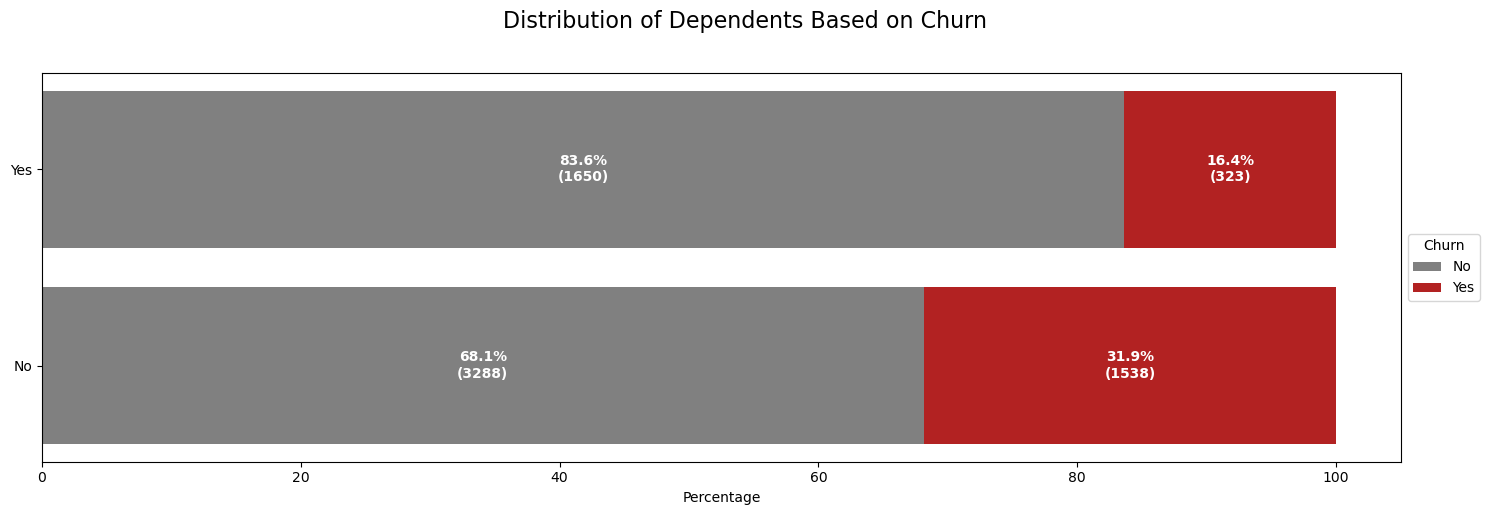

Churn,Dependents,No,Yes,No (%),Yes (%)
0,No,3288,1538,68.1%,31.9%
1,Yes,1650,323,83.6%,16.4%


In [353]:
plot_stacked_barh_churn(df, 'Dependents')

Lorem ipsum

#### 2.5.8 Bagaimanakah tingkat churn berbeda antara pelanggan yang menggunakan layanan telepon dan yang tidak?


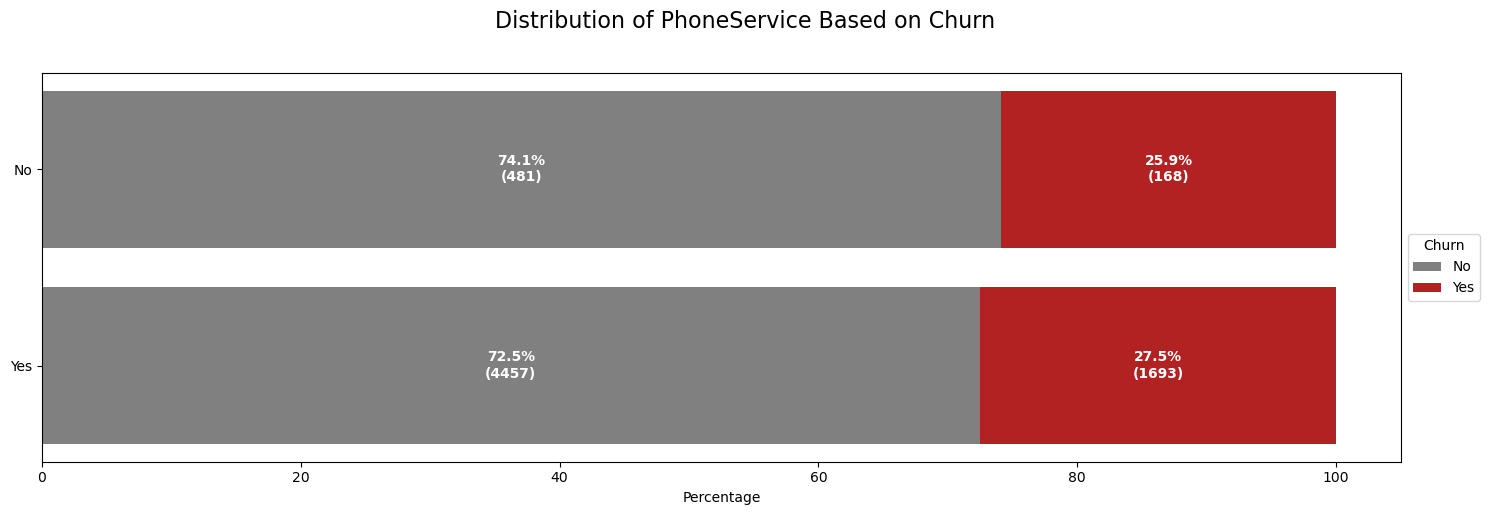

Churn,PhoneService,No,Yes,No (%),Yes (%)
0,Yes,4457,1693,72.5%,27.5%
1,No,481,168,74.1%,25.9%


In [354]:
plot_stacked_barh_churn(df, 'PhoneService')

Lorem ipsum

#### 2.5.9 Bagaimanakah tingkat churn berbeda antara pelanggan yang memiliki beberapa saluran telepon, satu saluran, atau tidak menggunakan layanan telepon?


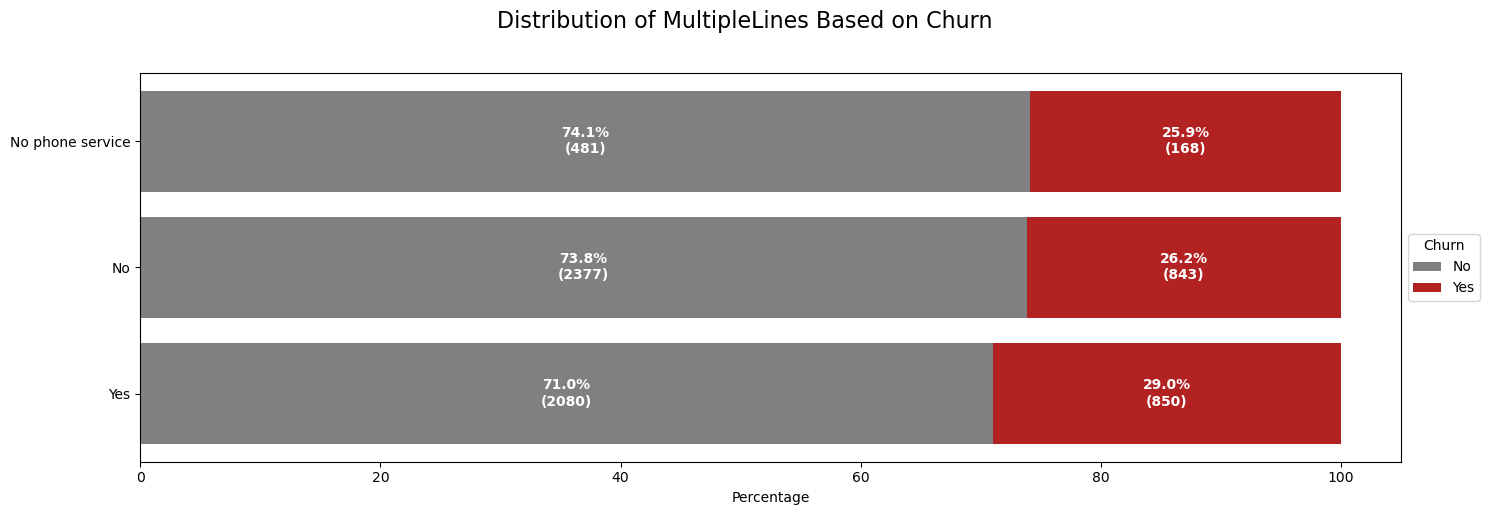

Churn,MultipleLines,No,Yes,No (%),Yes (%)
0,Yes,2080,850,71.0%,29.0%
1,No,2377,843,73.8%,26.2%
2,No phone service,481,168,74.1%,25.9%


In [355]:
plot_stacked_barh_churn(df, 'MultipleLines')

Lorem ipsum

#### 2.5.10 Bagaimanakah tingkat churn berbeda antara pelanggan yang menggunakan DSL, fiber optic, atau tidak menggunakan layanan internet?


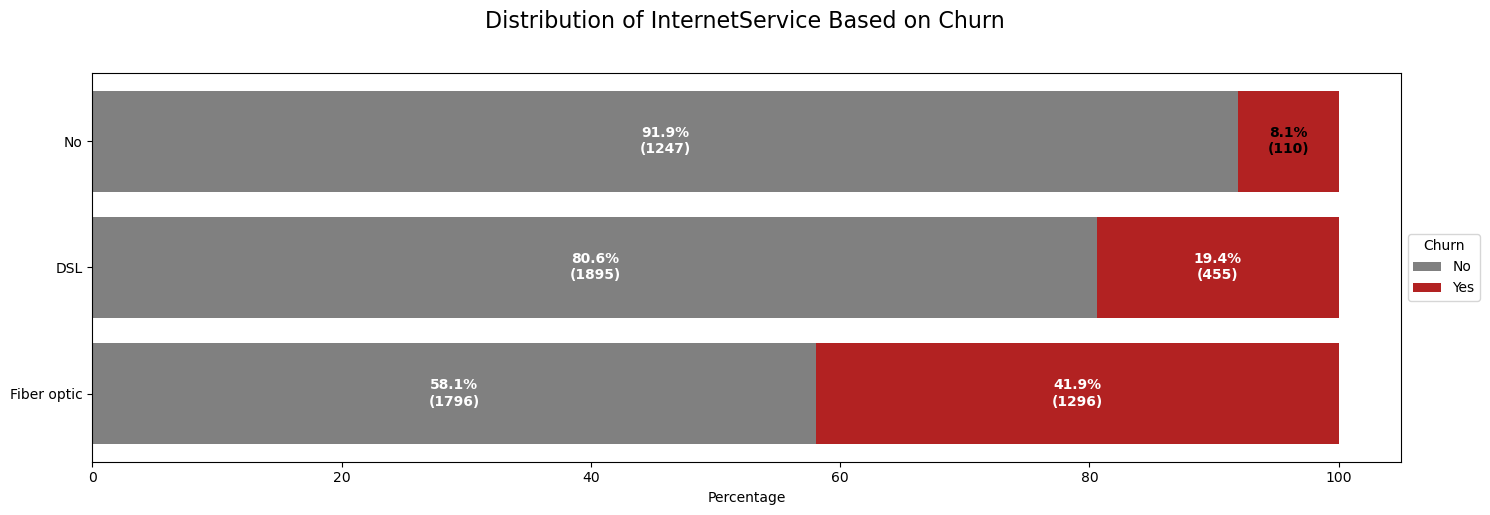

Churn,InternetService,No,Yes,No (%),Yes (%)
0,Fiber optic,1796,1296,58.1%,41.9%
1,DSL,1895,455,80.6%,19.4%
2,No,1247,110,91.9%,8.1%


In [356]:
plot_stacked_barh_churn(df, 'InternetService')

Lorem ipsum

#### 2.5.11 Bagaimanakah tingkat churn berbeda antara pelanggan yang menggunakan perlindungan keamanan online, tidak menggunakan, atau tidak memiliki layanan internet?


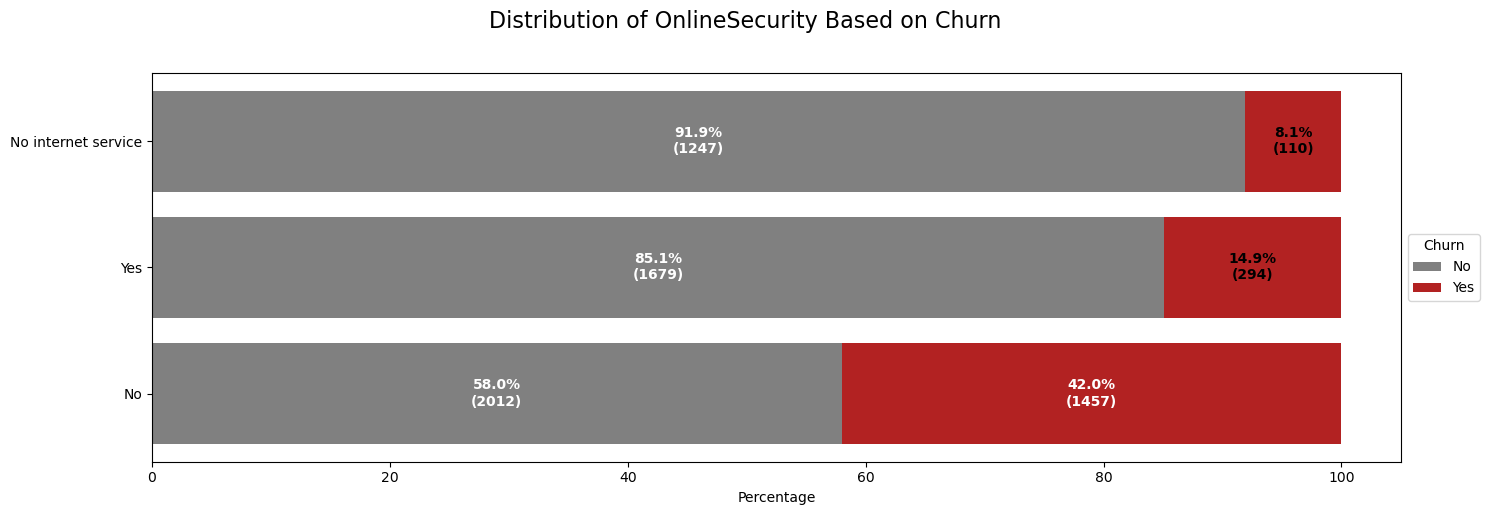

Churn,OnlineSecurity,No,Yes,No (%),Yes (%)
0,No,2012,1457,58.0%,42.0%
1,Yes,1679,294,85.1%,14.9%
2,No internet service,1247,110,91.9%,8.1%


In [357]:
plot_stacked_barh_churn(df, 'OnlineSecurity')

Lorem ipsum

#### 2.5.12 Bagaimanakah tingkat churn berbeda antara pelanggan yang menggunakan cadangan data online, tidak menggunakan, atau tidak memiliki layanan internet?


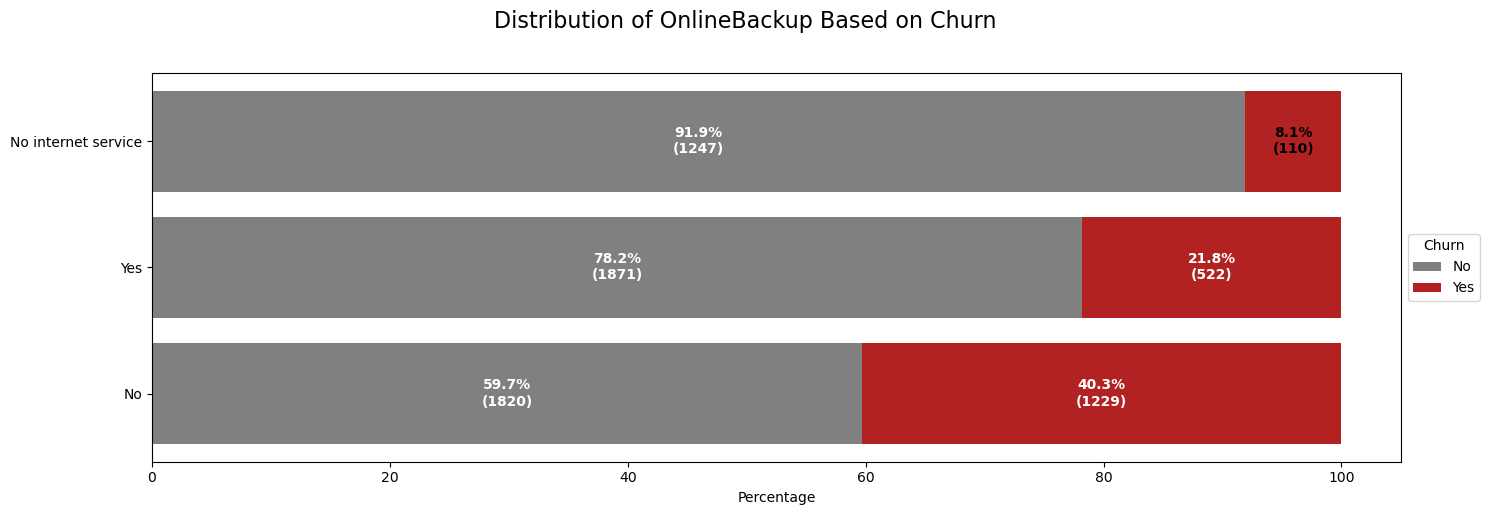

Churn,OnlineBackup,No,Yes,No (%),Yes (%)
0,No,1820,1229,59.7%,40.3%
1,Yes,1871,522,78.2%,21.8%
2,No internet service,1247,110,91.9%,8.1%


In [358]:
plot_stacked_barh_churn(df, 'OnlineBackup')

Lorem ipsum

#### 2.5.13 Bagaimanakah tingkat churn berbeda antara pelanggan yang menggunakan perlindungan perangkat, tidak menggunakan, atau tidak memiliki layanan internet?


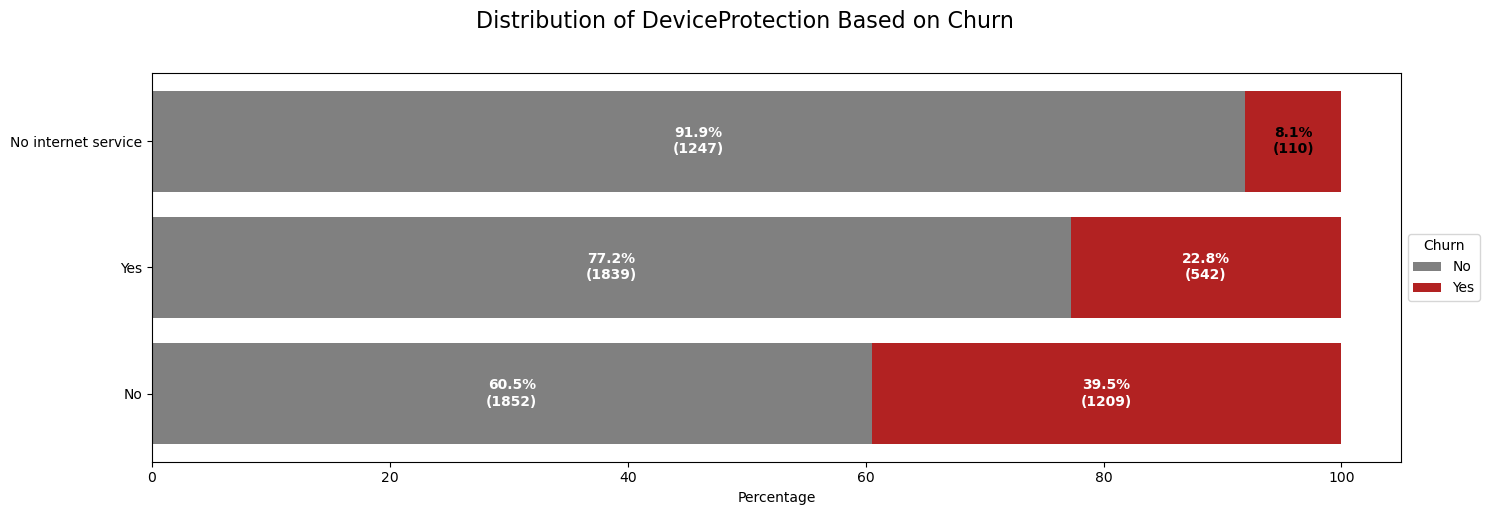

Churn,DeviceProtection,No,Yes,No (%),Yes (%)
0,No,1852,1209,60.5%,39.5%
1,Yes,1839,542,77.2%,22.8%
2,No internet service,1247,110,91.9%,8.1%


In [359]:
plot_stacked_barh_churn(df, 'DeviceProtection')

Lorem ipsum

#### 2.5.14 Bagaimanakah tingkat churn berbeda antara pelanggan yang menggunakan dukungan teknis, tidak menggunakan, atau tidak memiliki layanan internet?


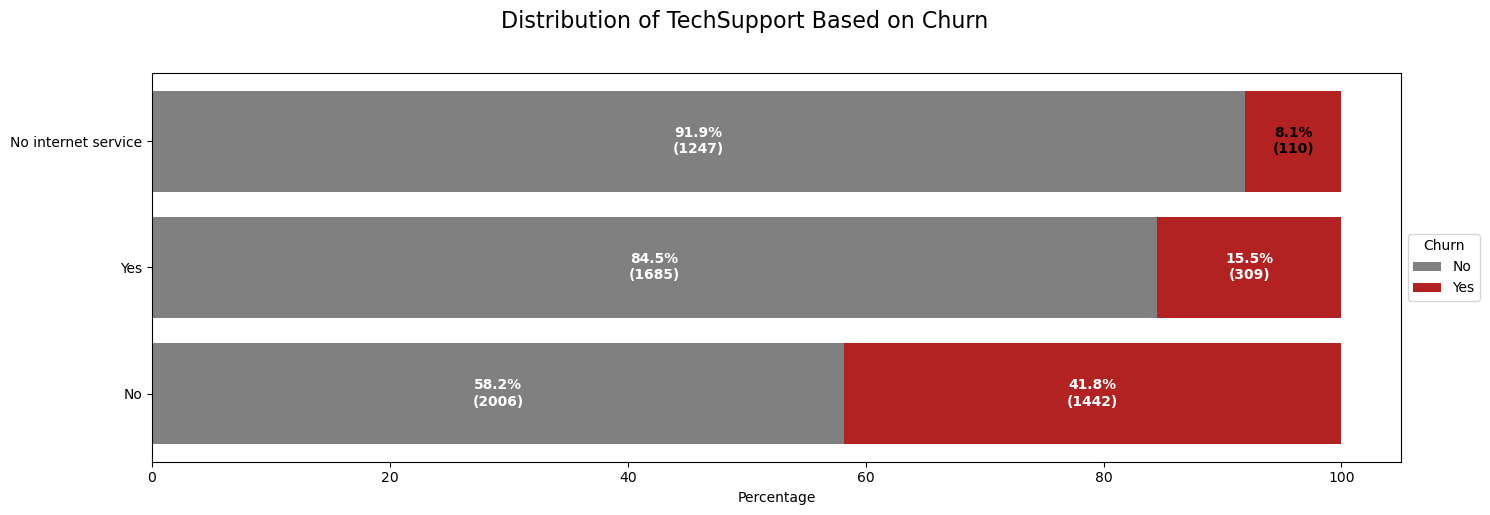

Churn,TechSupport,No,Yes,No (%),Yes (%)
0,No,2006,1442,58.2%,41.8%
1,Yes,1685,309,84.5%,15.5%
2,No internet service,1247,110,91.9%,8.1%


In [360]:
plot_stacked_barh_churn(df, 'TechSupport')

Lorem ipsum

#### 2.5.15 Bagaimanakah tingkat churn berbeda antara pelanggan yang menggunakan layanan streaming TV, tidak menggunakan, atau tidak memiliki layanan internet?


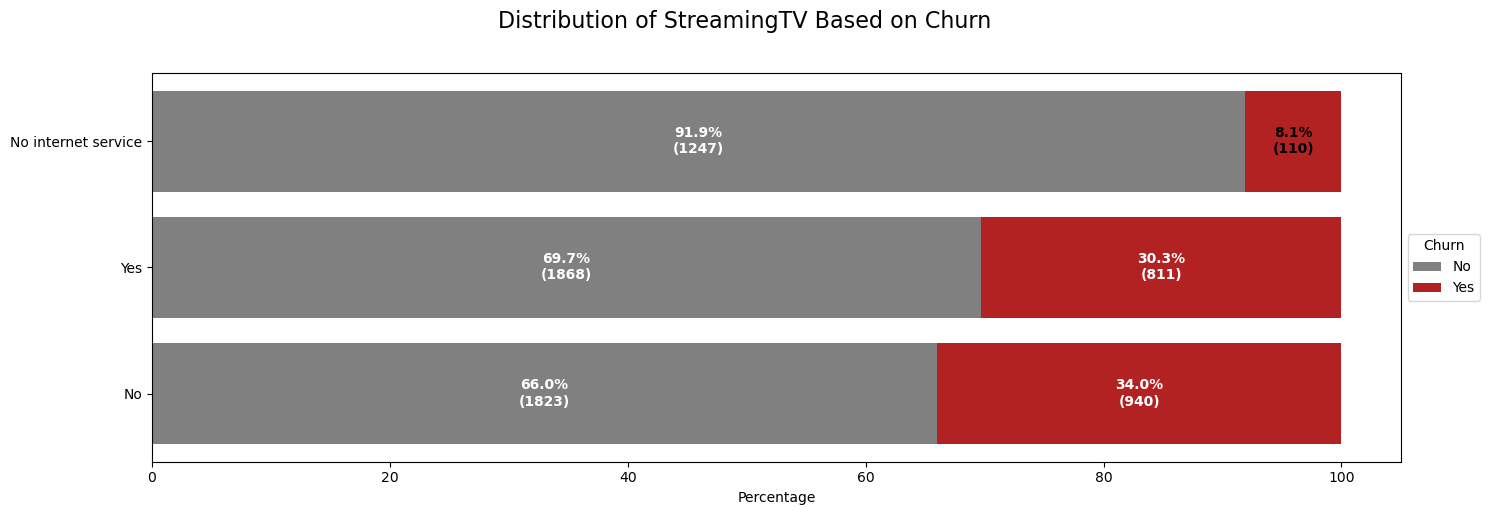

Churn,StreamingTV,No,Yes,No (%),Yes (%)
0,No,1823,940,66.0%,34.0%
1,Yes,1868,811,69.7%,30.3%
2,No internet service,1247,110,91.9%,8.1%


In [361]:
plot_stacked_barh_churn(df, 'StreamingTV')

Lorem ipsum

#### 2.5.16 Bagaimanakah tingkat churn berbeda antara pelanggan yang menggunakan layanan streaming film, tidak menggunakan, atau tidak memiliki layanan internet?


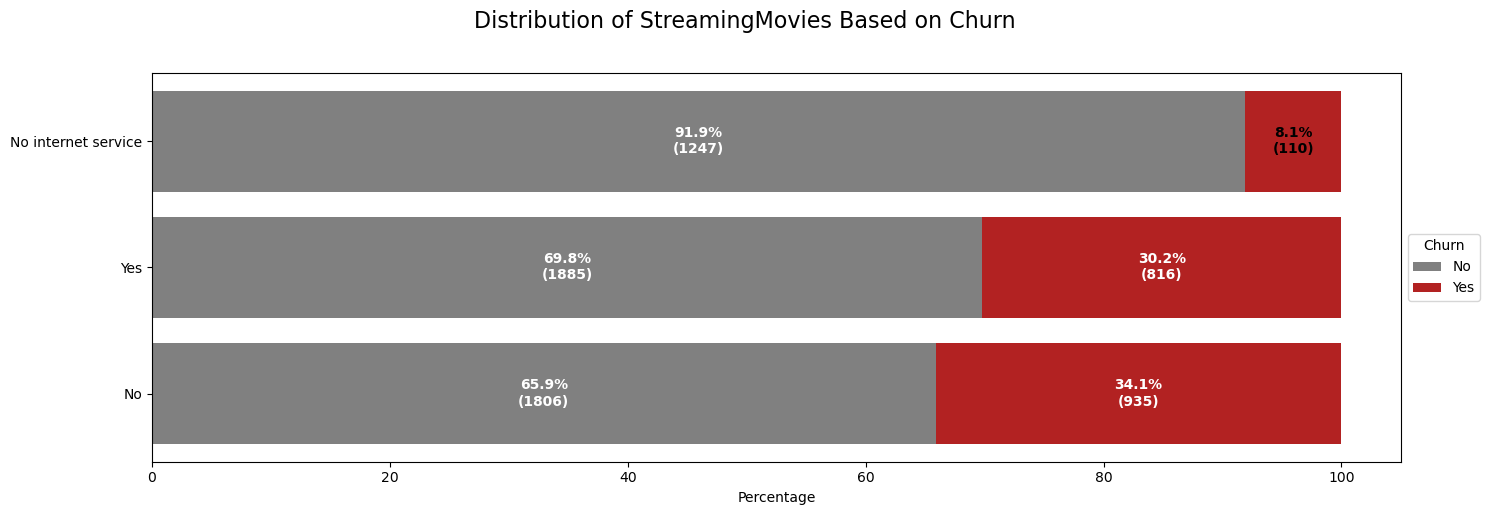

Churn,StreamingMovies,No,Yes,No (%),Yes (%)
0,No,1806,935,65.9%,34.1%
1,Yes,1885,816,69.8%,30.2%
2,No internet service,1247,110,91.9%,8.1%


In [362]:
plot_stacked_barh_churn(df, 'StreamingMovies')

Lorem ipsum

#### 2.5.17 Bagaimanakah tingkat churn berbeda berdasarkan jenis kontrak langganan yang dipilih pelanggan?


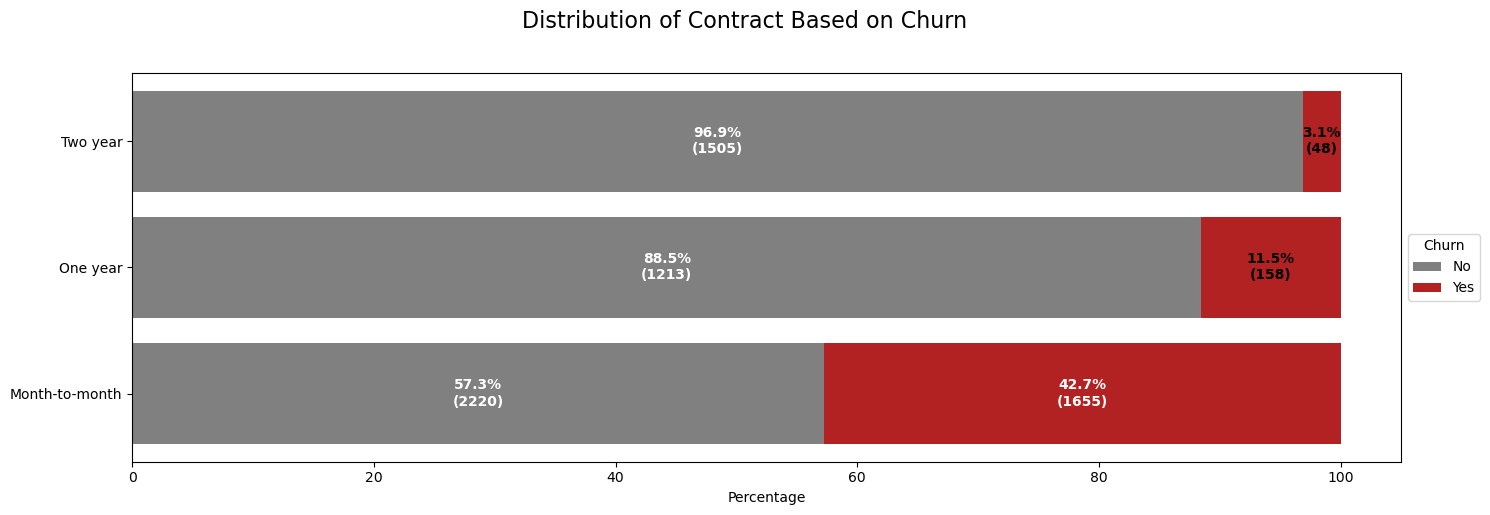

Churn,Contract,No,Yes,No (%),Yes (%)
0,Month-to-month,2220,1655,57.3%,42.7%
1,One year,1213,158,88.5%,11.5%
2,Two year,1505,48,96.9%,3.1%


In [363]:
plot_stacked_barh_churn(df, 'Contract')

Lorem ipsum

#### 2.5.18 Bagaimanakah tingkat churn berbeda antara pelanggan yang menggunakan tagihan tanpa kertas dan yang tidak?


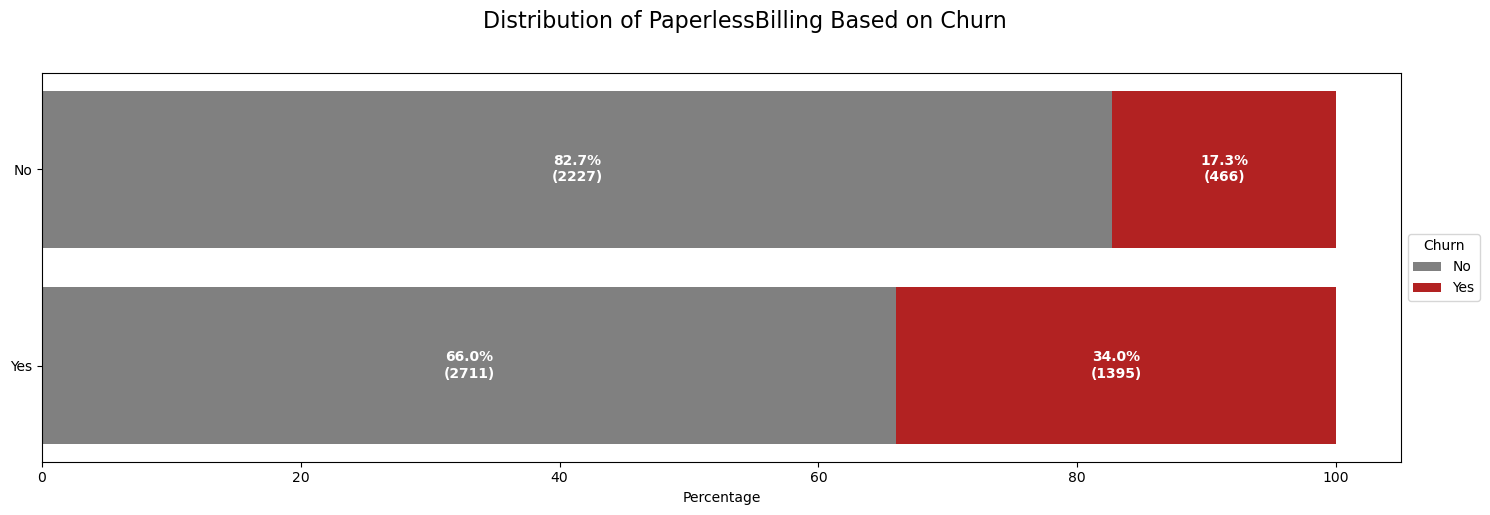

Churn,PaperlessBilling,No,Yes,No (%),Yes (%)
0,Yes,2711,1395,66.0%,34.0%
1,No,2227,466,82.7%,17.3%


In [364]:
plot_stacked_barh_churn(df, 'PaperlessBilling')

Lorem ipsum

#### 2.5.19 Bagaimanakah tingkat churn berbeda berdasarkan metode pembayaran yang digunakan pelanggan?


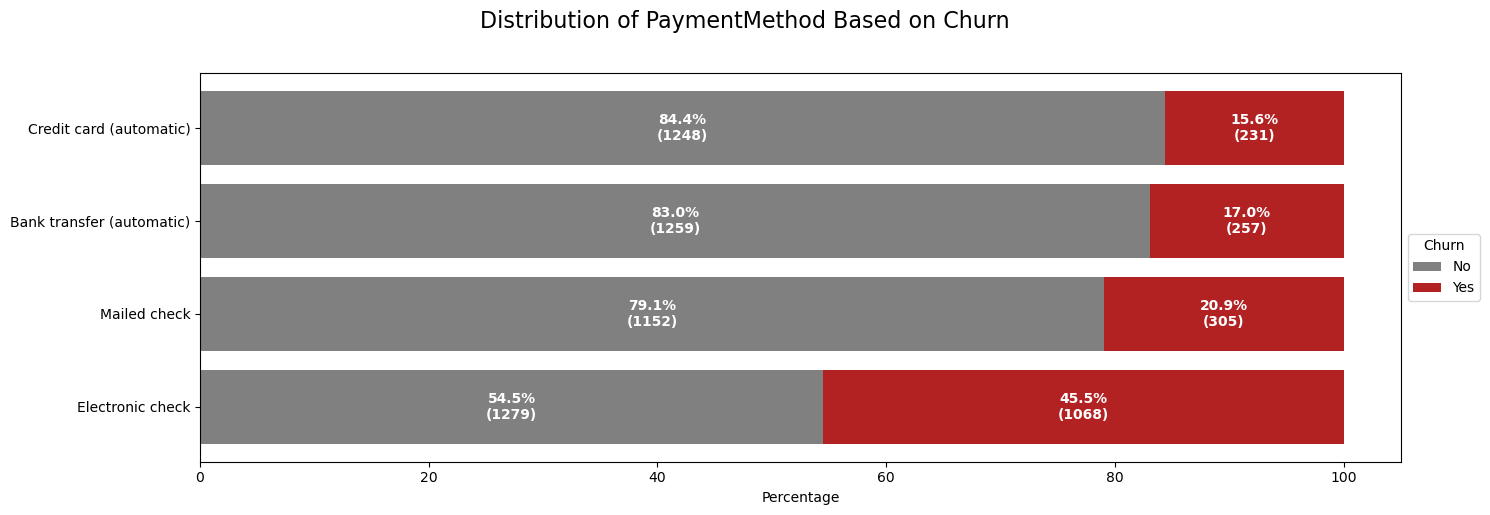

Churn,PaymentMethod,No,Yes,No (%),Yes (%)
0,Electronic check,1279,1068,54.5%,45.5%
1,Mailed check,1152,305,79.1%,20.9%
2,Bank transfer (automatic),1259,257,83.0%,17.0%
3,Credit card (automatic),1248,231,84.4%,15.6%


In [365]:
plot_stacked_barh_churn(df, 'PaymentMethod')

Lorem ipsum

#### 2.5.20 Bagaimanakah hubungan antara lamanya berlangganan dan biaya bulanan berdasarkan pelanggan yang churn dan tidak churn ?

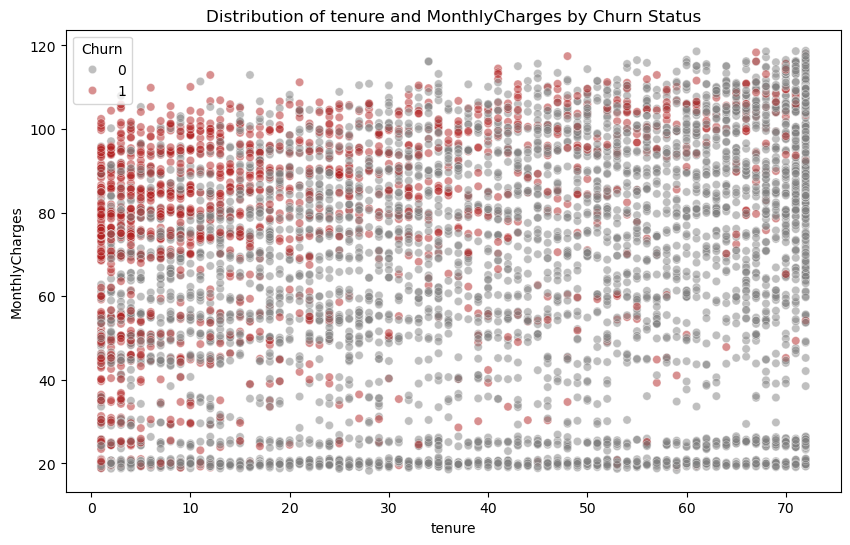


Spearman Correlation (Churn): 0.4854
Spearman Correlation (Not Churn): 0.3200



In [366]:
# Mapping Target
df['Churn'] = df['Churn'].map({'Yes' : 1, 'No':0})

# Mapping Column SeniorCitizen
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

plot_scatter_churn(df, 'tenure', 'MonthlyCharges')

Lorem ipsum

#### 2.5.21 Bagaimanakah hubungan antara lamanya berlangganan dan total pengeluaran bulanan berdasarkan pelanggan yang churn dan tidak churn ?

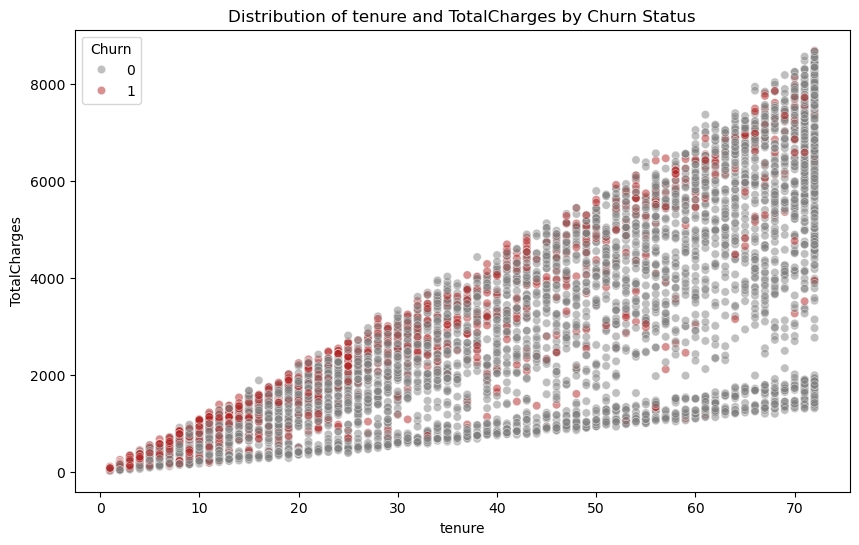


Spearman Correlation (Churn): 0.9716
Spearman Correlation (Not Churn): 0.8352



In [367]:
plot_scatter_churn(df, 'tenure', 'TotalCharges')

Lorem ipsum

#### 2.5.21 Bagaimanakah hubungan antara total pengeluaran bulanan dan biaya bulanan berdasarkan pelanggan yang churn dan tidak churn ?

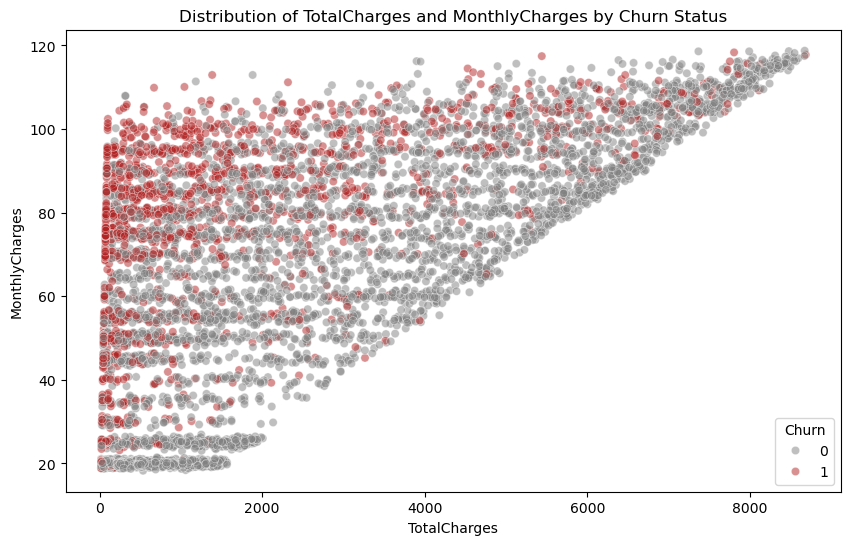


Spearman Correlation (Churn): 0.6566
Spearman Correlation (Not Churn): 0.7410



In [368]:
plot_scatter_churn(df, 'TotalCharges', 'MonthlyCharges')

Lorem ipsum

## **Save Dataset**

In [369]:
df.to_csv('../Data/Telco_Churn_clean_dataset.csv')